In [1]:
# !pip3 install --user uproot

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.cm import ScalarMappable


In [2]:
mc_data = np.load("/data/martemev/output_data/onlysignal_evt4.npy")[:, 2:]
mc_data.shape

(30720, 4492)

In [3]:
event_step = 30720
ada_step = 12
collection_step = 960
readout_step = 800

In [4]:
# collection_channels = mc_data[mc_data[:, 2] == 1][:, 3:]
# readout_channels = mc_data[mc_data[:, 2] == 0][:, 3:]

In [5]:
# from matplotlib.colors import BoundaryNorm
# from matplotlib.ticker import MaxNLocator
# from matplotlib.cm import ScalarMappable

# from sklearn.preprocessing import StandardScaler, QuantileTransformer
# import skimage


# def plot_plane(adcs, fig, axis, figsize=None, title='pcolormesh with levels'):
#     y, x = np.mgrid[slice(0, adcs.shape[1], 1),
#                     slice(0, adcs.shape[0], 1)]
#     z = adcs.T
#     levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
#     cmap = plt.get_cmap('coolwarm')
#     norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
#     axis.set_title(title)
#     im = axis.pcolormesh(x, y, z, cmap=cmap, norm=norm)
#     sm = ScalarMappable(norm=norm, cmap=cmap)
#     sm.set_array([])
#     cbar = fig.colorbar(sm, ax=axis)
# #     cbar.ax.set_title("scale")

# def max_pool(a, k):
#     return skimage.measure.block_reduce(a, (k,k), np.max)

# def scale(a):
#     return StandardScaler().fit_transform(a)
    
# def plot_apa(apa, figsize=None, title='APA#None'):    
#     fig, axes = plt.subplots(3, 1, figsize=(30, 50))
#     plot_plane(scale(apa[:readout_step]), fig, axes[0],  title=title+' first readout plane')
#     plot_plane(scale(apa[readout_step:2*readout_step]), fig, axes[1], title=title+' second readout plane')
#     im = plot_plane(scale(apa[2*readout_step:]), fig, axes[2], title=title+' collection plane')
#     plt.tight_layout()
# #     plt.colorbar()
#     plt.show()

In [6]:
# for apa in range(ada_step):
#     plot_apa(mc_data[apa*(2*readout_step + collection_step):(apa+1)*(2*readout_step + collection_step)],
#              title='{}th APA'.format(apa))

In [4]:
def plot_plane(plane, title='placeholder', gridsize=500):
    # add grid points
    x = np.array(list(range(plane.shape[0])) * plane.shape[1])
    y = np.array(list(range(plane.shape[1])) * plane.shape[0])

    # add ADC values as color
    z = plane.reshape(-1)

    plt.figure(figsize=(15, 15))

    # colormap stuff
    levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
    cmap = plt.get_cmap('coolwarm')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # plotting
    plt.hexbin(x, y, C=z, gridsize=gridsize, cmap=cmap)
    plt.title(title)

    plt.colorbar(sm)
    plt.show()


In [8]:
# import skimage.measure

# def max_pool(arr, kernel):
#     return skimage.measure.block_reduce(arr, kernel, np.max)


In [5]:
plane = mc_data[1*(2*readout_step + collection_step):(1+1)*(2*readout_step + collection_step)] + 1800
r_plane = plane[:readout_step]
# # plot_plane(max_pool(r_plane, (3, 5)), 'apa1, readout_plane, clear mc', gridsize=100)
# plot_plane(r_plane, 'apa1, readout_plane, clear mc')

#### Getting noised txt files

In [6]:
event = np.load('../Data/input_noised_data/event_{}_noised.npy'.format(3))

In [7]:
event = event[:, 3:]

In [9]:
noised_plane = event[1*(2*readout_step + collection_step):(1+1)*(2*readout_step + collection_step)]
rn_plane = noised_plane[:readout_step]
# # plot_plane(max_pool(rn_plane, (3, 5)), 'apa1, readout_plane, dirty mc', gridsize=100)
# plot_plane(rn_plane, 'apa1, readout_plane, dirty mc')

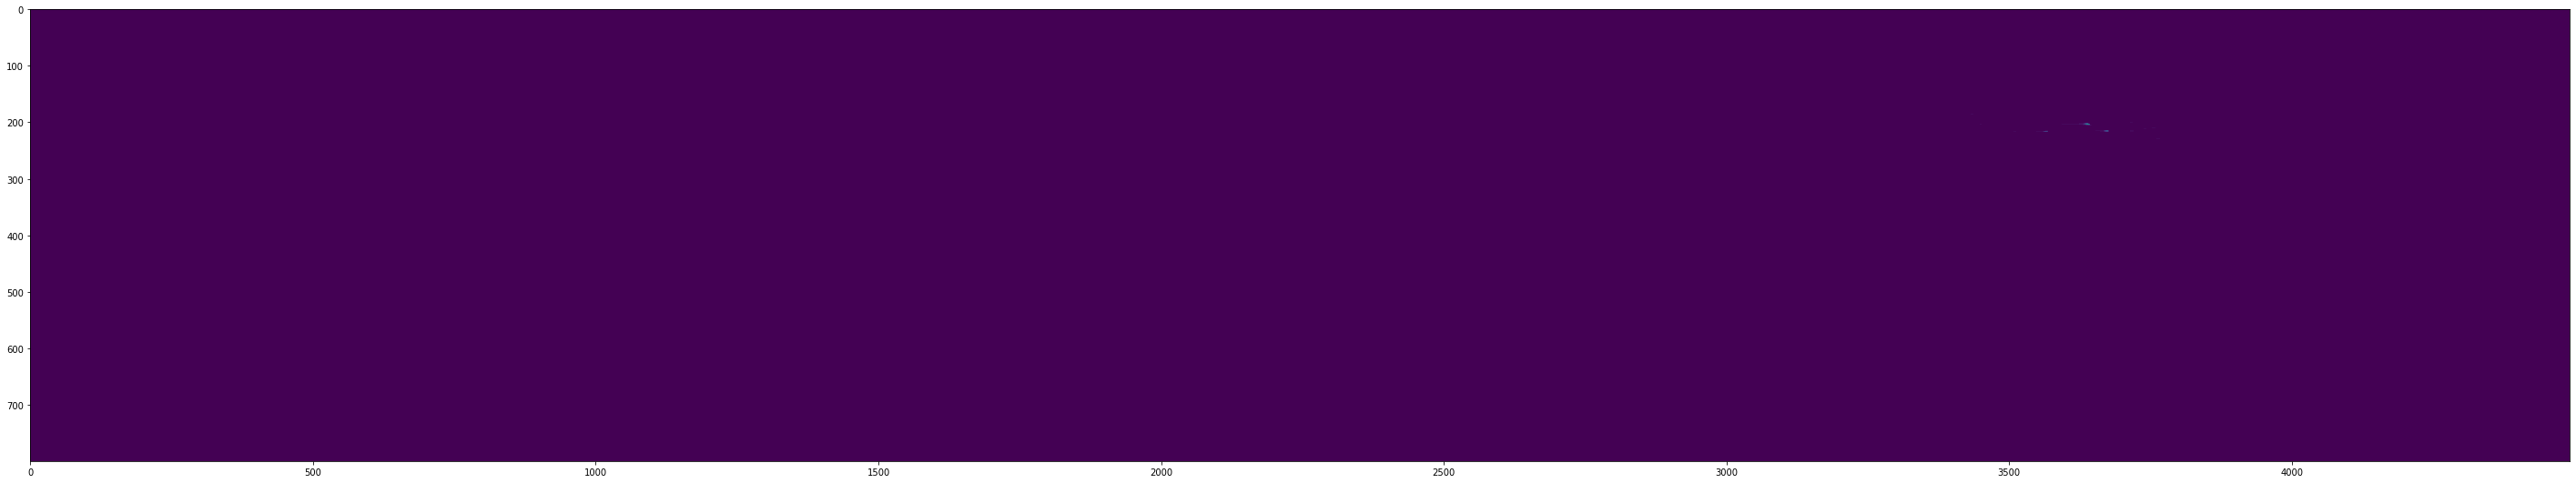

In [10]:
plt.figure(figsize=(50, 65))

plt.imshow(r_plane)
plt.show()

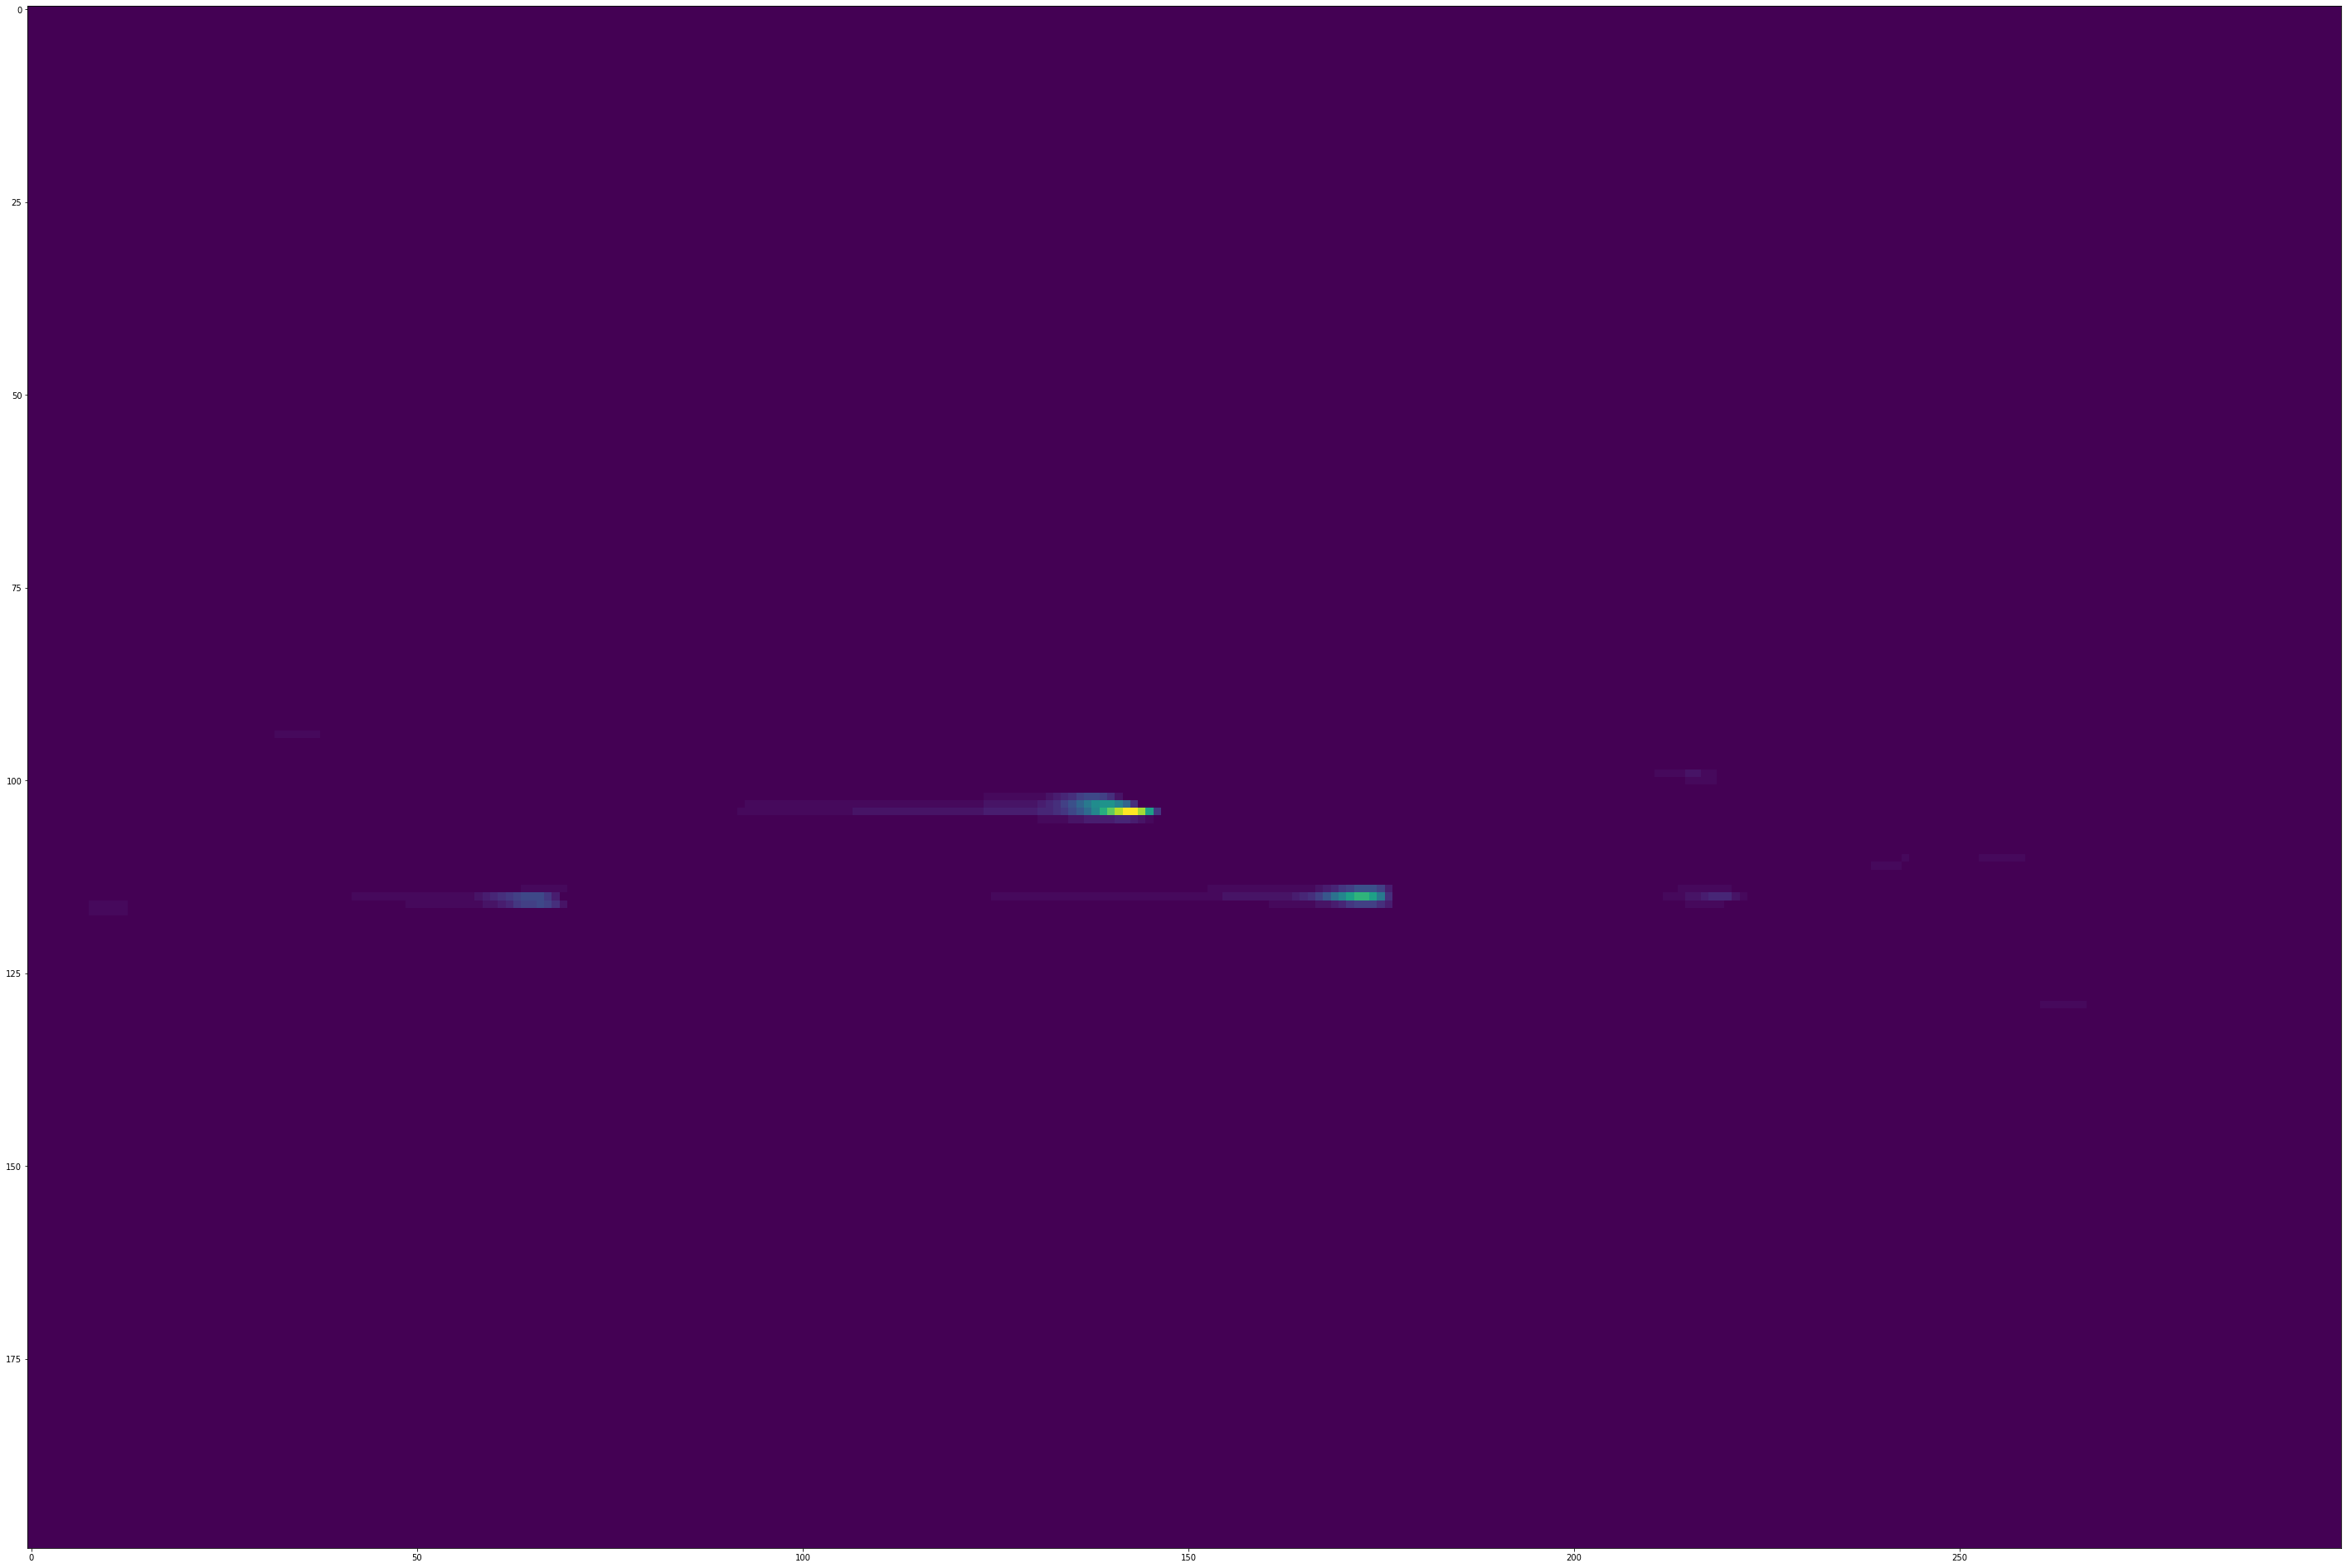

In [17]:
plt.figure(figsize=(50, 65))

plt.imshow(r_plane[100:300, 3500:3800])
plt.show()

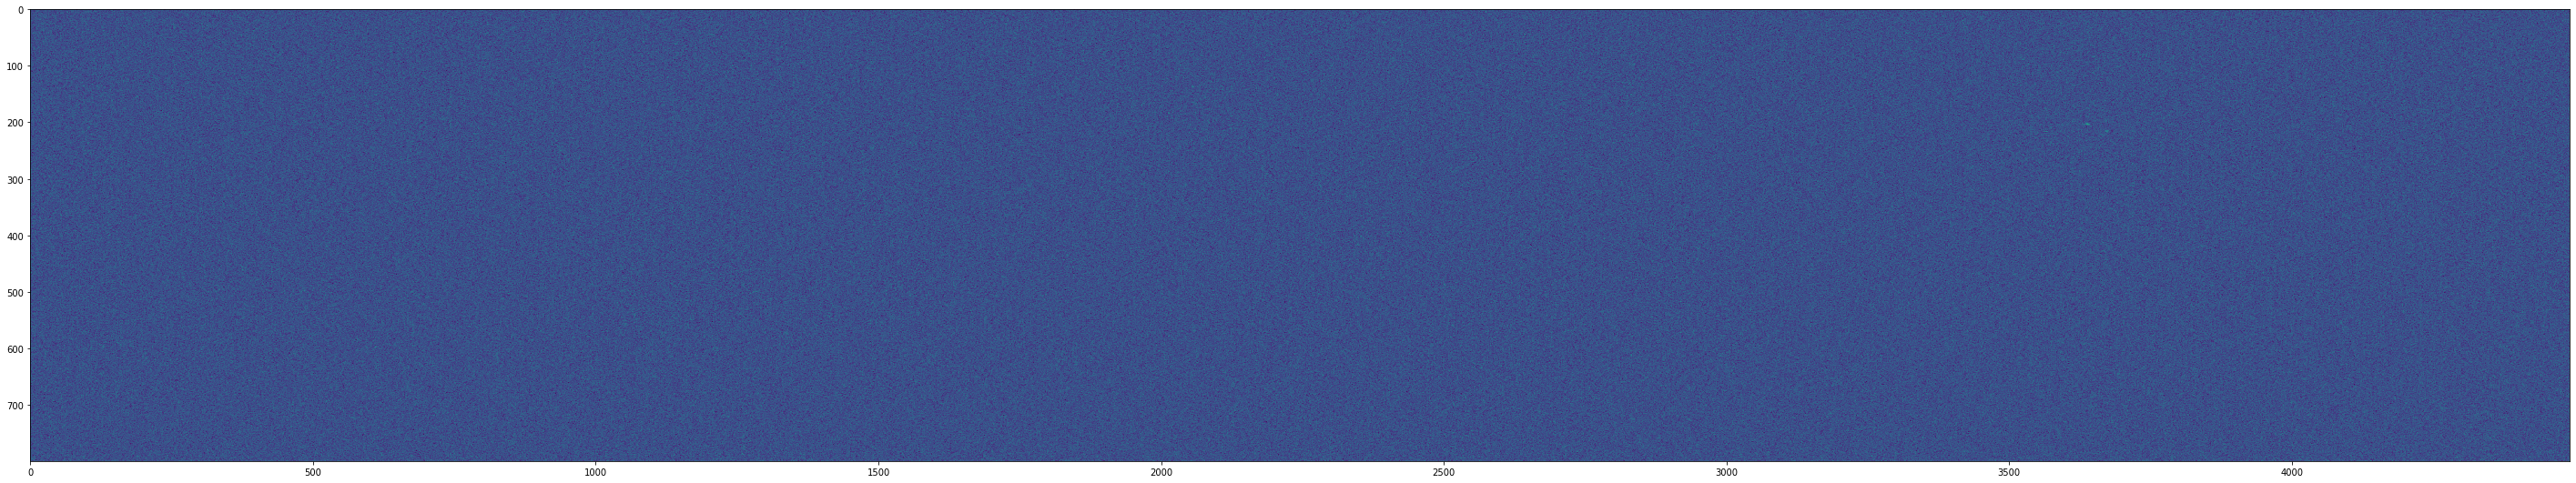

In [11]:
plt.figure(figsize=(50, 65))

plt.imshow(rn_plane)
plt.show()

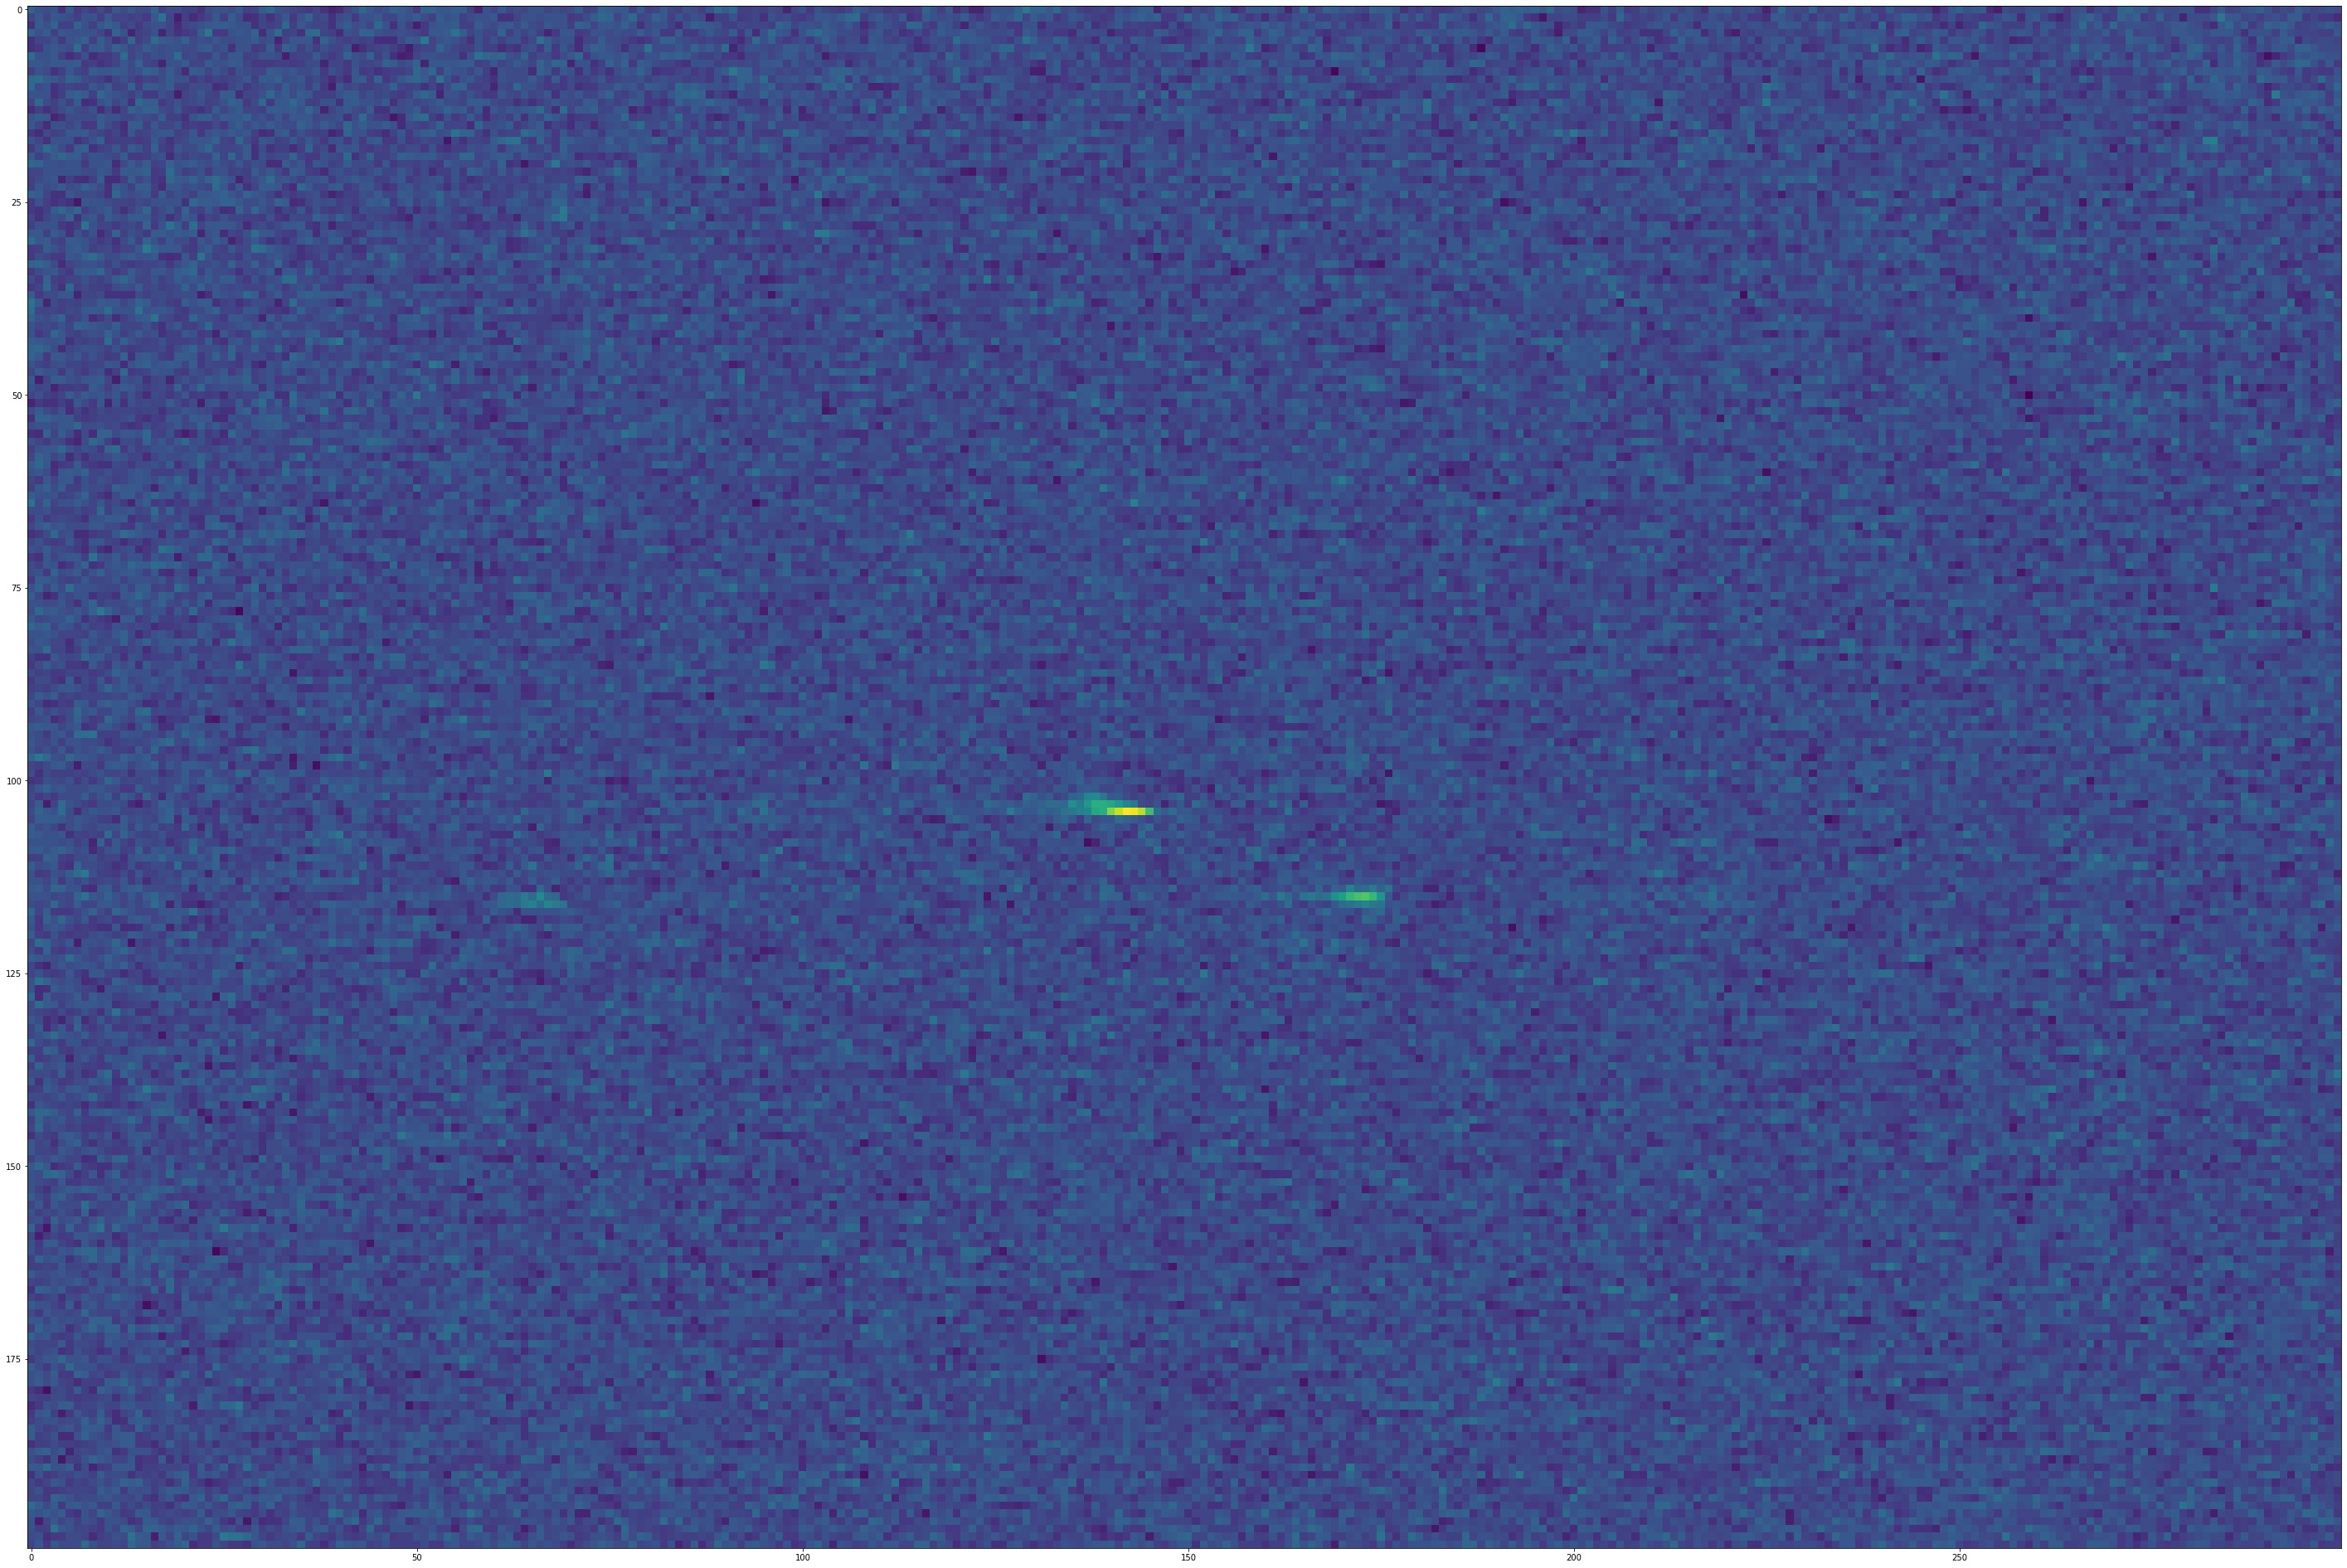

In [18]:
plt.figure(figsize=(50, 65))

plt.imshow(rn_plane[100:300, 3500:3800])
plt.show()

### Convert all events-panes to a good format

In [52]:
import tqdm

In [54]:
!mkdir ../Data/StructuredData0

In [ ]:
for event_num in tqdm.tqdm(range(100)):
    mc_data = np.load("/data/martemev/output_data/onlysignal_evt{}.npy".format(event_num+1))[:, 2:]
    noised_data = np.load('../Data/input_noised_data/event_{}_noised.npy'.format(event_num))[:, 3:]
    

In [56]:
mc_data = np.load("/data/martemev/output_data/onlysignal_evt{}.npy".format(0+1))[:, 2:]
noised_data = np.load('../Data/input_noised_data/event_{}_noised.npy'.format(0))[:, 3:]

    

In [90]:
import torch

def twodsoftmax(arr):
    arr = arr - arr.max()
    return torch.exp(arr)/torch.exp(arr).sum()

pane = torch.Tensor(mc_data[:800])
pane = twodsoftmax(pane)
bern = torch.distributions.bernoulli.Bernoulli(probs=pane)

In [91]:
for i in range(10):
    print(torch.nonzero(bern.sample()))

tensor([[ 104, 3819],
        [ 152, 1978],
        [ 604, 3429],
        [ 750, 2268]])
tensor([[ 174, 1018]])
tensor([[ 492, 1336]])
tensor([[  51, 1818],
        [ 582,  258],
        [ 700, 3128]])
tensor([], size=(0, 2), dtype=torch.int64)
tensor([], size=(0, 2), dtype=torch.int64)
tensor([[ 622, 2858],
        [ 630, 1582]])
tensor([], size=(0, 2), dtype=torch.int64)
tensor([], size=(0, 2), dtype=torch.int64)
tensor([[ 124, 3498]])


In [92]:
pane.max()

tensor(2.7827e-07)

tensor(2.7827e-07)

In [77]:
torch.nonzero(bern.sample())

tensor([[ 439, 2700]])

In [58]:
noised_data.shape

(30720, 4492)

### Full data from .root file

In [ ]:
with open('../Data/input_noised_data/{}'.format('event.txt'), 'r') as whole_file:
    file = whole_file.readlines()
    for i in tqdm.tqdm(range(0, len(file)//30720)): # ticks in event
        event = file[i * 30720:(i+1) * 30720]
        event_matrix = np.zeros((len(event), len(event[0].split())), dtype=np.int16)
        for ind, tick in enumerate(event):
            event_matrix[ind, :] = [int(i) for i in tick.split()]
        np.save('../Data/input_noised_data/event_{}_noised'.format(i), event_matrix, allow_pickle=False) 


  3%|▎         | 3/100 [01:50<59:58, 37.10s/it]  

In [196]:
len(file[0 * 30720:1 * 30720])

30720

In [ ]:
with open('../Data/{}'.format('event.txt'), 'r') as f:
    file = f.readlines()
    event_matrix = np.zeros((len(file), len(file[0].split())), dtype=np.int16)
    for ind, event in enumerate(file):
        event_matrix[ind, :] = [int(i) for i in event.split()]
    events = event_matrix